In [55]:
import importlib
import sys
import subprocess

def instalar(paquete, nombre=None):
  if nombre is None:
    nombre = paquete
  try:
    importlib.import_module(paquete)
    print(f"{nombre} ya esta instalado")
  except ImportError:
    print(f"Instalando {nombre}...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", paquete])

instalar("polars")
instalar("numpy")
instalar("seaborn")
instalar("matplotlib")
instalar("scikit-learn","sklearn")

polars ya esta instalado
numpy ya esta instalado
seaborn ya esta instalado
matplotlib ya esta instalado
Instalando sklearn...


In [56]:
import polars as pl
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import os

Importando el dataset

Para importar sin problemas de archivos utilizaremos el codigo otorgado por la pagina


In [69]:
try:
  df = pl.read_csv("diabetes.csv")
except:
  !pip install kagglehub
  import kagglehub
  from kagglehub import KaggleDatasetAdapter

  # Set the path to the file you'd like to load


  # Load the latest version
  path = kagglehub.dataset_download(
      "mathchi/diabetes-data-set"
  )

  file_path = os.path.join(path, "diabetes.csv")

  df = pl.read_csv(file_path)


# Viendo un poco de la *informacion*

In [58]:
df.head()

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
i64,i64,i64,i64,i64,f64,f64,i64,i64
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1


In [59]:
df.tail()

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
i64,i64,i64,i64,i64,f64,f64,i64,i64
10,101,76,48,180,32.9,0.171,63,0
2,122,70,27,0,36.8,0.34,27,0
5,121,72,23,112,26.2,0.245,30,0
1,126,60,0,0,30.1,0.349,47,1
1,93,70,31,0,30.4,0.315,23,0


In [60]:
df.schema

Schema([('Pregnancies', Int64),
        ('Glucose', Int64),
        ('BloodPressure', Int64),
        ('SkinThickness', Int64),
        ('Insulin', Int64),
        ('BMI', Float64),
        ('DiabetesPedigreeFunction', Float64),
        ('Age', Int64),
        ('Outcome', Int64)])

Buscando valores nullos o 'incorrectos'

In [61]:
conteo_nullos = df.null_count()
print(conteo_nullos)

shape: (1, 9)
┌─────────────┬─────────┬───────────────┬───────────────┬───┬─────┬────────────────┬─────┬─────────┐
│ Pregnancies ┆ Glucose ┆ BloodPressure ┆ SkinThickness ┆ … ┆ BMI ┆ DiabetesPedigr ┆ Age ┆ Outcome │
│ ---         ┆ ---     ┆ ---           ┆ ---           ┆   ┆ --- ┆ eeFunction     ┆ --- ┆ ---     │
│ u32         ┆ u32     ┆ u32           ┆ u32           ┆   ┆ u32 ┆ ---            ┆ u32 ┆ u32     │
│             ┆         ┆               ┆               ┆   ┆     ┆ u32            ┆     ┆         │
╞═════════════╪═════════╪═══════════════╪═══════════════╪═══╪═════╪════════════════╪═════╪═════════╡
│ 0           ┆ 0       ┆ 0             ┆ 0             ┆ … ┆ 0   ┆ 0              ┆ 0   ┆ 0       │
└─────────────┴─────────┴───────────────┴───────────────┴───┴─────┴────────────────┴─────┴─────────┘


In [62]:
df.select([pl.col(c).is_nan().sum().alias(c) for c in df.columns])


Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0


Verificando si hay valores distintos a [0 1] en los resultados (Outcome)

shape: (2, 2)
┌─────────┬───────┐
│ Outcome ┆ count │
│ ---     ┆ ---   │
│ i64     ┆ u32   │
╞═════════╪═══════╡
│ 1       ┆ 268   │
│ 0       ┆ 500   │
└─────────┴───────┘


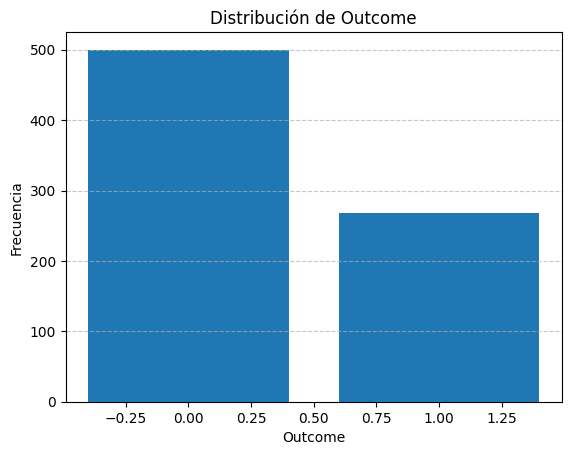

In [63]:

conteo_clases = df['Outcome'].value_counts()
print(conteo_clases)

# Graficando
x = conteo_clases['Outcome'].to_list()
y = conteo_clases['count'].to_list()
plt.bar(x, y)
plt.title('Distribución de Outcome')
plt.xlabel('Outcome')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle ='--', alpha = 0.7)
plt.show()

In [64]:
# Total de registros
total = conteo_clases['count'].sum()

c_0 = conteo_clases.filter(pl.col('Outcome')==0)['count'][0]
c_1 = conteo_clases.filter(pl.col('Outcome')==1)['count'][0]


print(f"Conteo de 0: { c_0 * 100 / total }%")
print(f"Conteo de 1: { c_1 * 100 / total }%")


Conteo de 0: 65.10416666666667%
Conteo de 1: 34.895833333333336%


Hay un poco de desbalance (desbalance moderado). Pero se puede trabajar con esa relacion

# Aplicando Modelo

Para este caso se aplicara KNN con k = 15

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

#Separando
X = df.select(pl.exclude('Outcome'))
y = df['Outcome']

#Escalando
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Entrenando
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

#Aplicando Random Forest
fr = RandomForestClassifier(class_weight='balanced', n_estimators=25, max_depth=5, max_features= 'sqrt', min_samples_split=2, min_samples_leaf=1,  random_state=42)
fr.fit(X_train, y_train)

#Predecir
y_pred = fr.predict(X_test)


# Resultados y Metricas

In [66]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.7272727272727273
Precision: 0.5825242718446602
Recall: 0.75
F1 Score: 0.6557377049180327


Matriz de Confusión:
[[108  43]
 [ 20  60]]


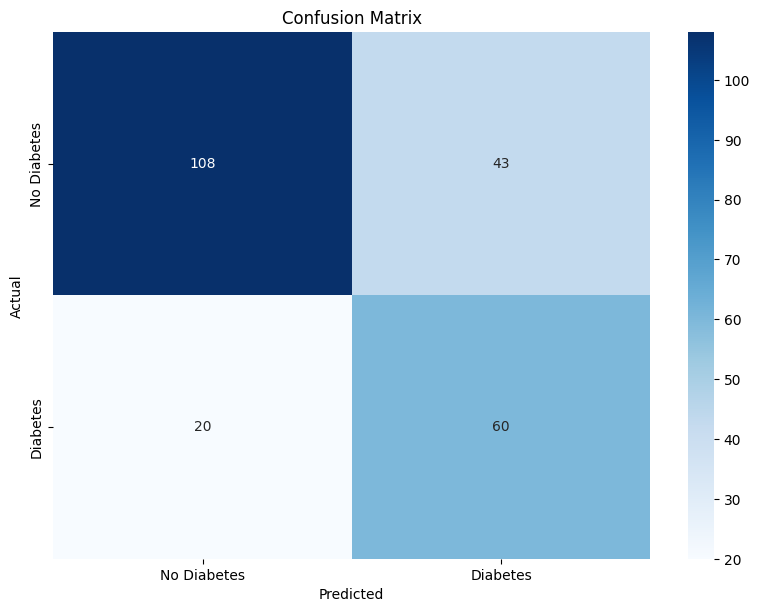

In [67]:
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(cm)
plt.figure(figsize=(8, 6))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.tight_layout()
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

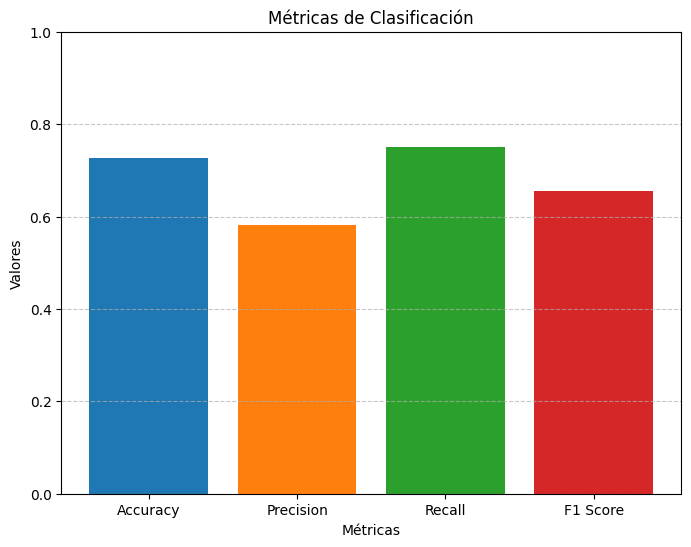

In [68]:
metricas = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}
colores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

plt.figure(figsize=(8, 6))
plt.ylim(0, 1)
plt.bar(metricas.keys(), metricas.values(), color=colores)
plt.title('Métricas de Clasificación')
plt.xlabel('Métricas')
plt.ylabel('Valores')
plt.grid(axis='y', linestyle ='--', alpha = 0.7)
plt.show()